### 1. 实现最邻近插值 2.实现双线性插值（含中心重合推导） 3.实现直方图均衡化

In [59]:
import cv2
import numpy as np


img = cv2.imread('xiugou.jpg')
shape = img.shape[0:2]
changed_size = [500,500]
changed = np.zeros((changed_size[0],changed_size[1],3),dtype = np.uint8)
delta_w = shape[0]/changed_size[0]
delta_h = shape[1]/changed_size[1]
for i in range(changed_size[0]):
    for j in range(changed_size[1]):
        changed[i,j] = img[int(i*delta_w+0.5)][int(j*delta_h+0.5)]

# print(img[int(180*delta_w+0.5)][int(230*delta_h+0.5)])
# print(changed[180][230])
cv2.imshow('pic',img)
cv2.imshow('changed',changed)
cv2.waitKey()
cv2.destroyAllWindows()

In [60]:
import cv2
import numpy as np


img = cv2.imread('xiugou.jpg')
shape = img.shape[0:2]
changed_size = [500,500]
changed_b = np.zeros((changed_size[0],changed_size[1],3),dtype = np.uint8)
delta_w = shape[0]/changed_size[0]
delta_h = shape[1]/changed_size[1]
for h in range(changed_size[0]-1):
    for w in range(changed_size[1]-1):
        x = w*delta_w
        y = h*delta_h
        R1 = img[int(x)+1,int(y)+1]*(x-int(x))+img[int(x),int(y)+1]*(1-x+int(x))
        R2 = img[int(x)+1,int(y)]*(x-int(x))+img[int(x),int(y)]*(1-x+int(x))
        changed_b[w,h] = R1*(y-int(y))+R2*(1-y+int(y))
cv2.imshow('pic',img)
cv2.imshow('changed_b',changed_b)
cv2.waitKey()
cv2.destroyAllWindows()

In [61]:
cv2.imshow('pic',img)
cv2.imshow('changed_b',changed_b)
cv2.imshow('changed',changed)
cv2.waitKey()
cv2.destroyAllWindows()

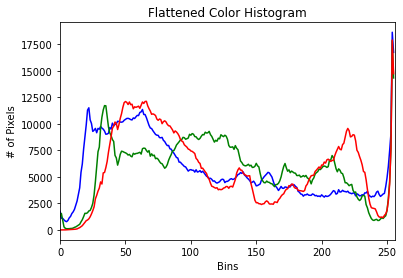

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("xiugou.jpg")
cv2.imshow("Original",image)


chans = cv2.split(image)
colors = ("b","g","r")
plt.figure()
plt.title("Flattened Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan,color) in zip(chans,colors):
    hist = cv2.calcHist([chan],[0],None,[256],[0,256])
    plt.plot(hist,color = color)
    plt.xlim([0,256])
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

In [62]:
# 彩色图像直方图均衡化
img = cv2.imread("xiugou.jpg", 1)
cv2.imshow("src", img)

# 彩色图像均衡化,需要分解通道 对每一个通道均衡化
(b, g, r) = cv2.split(img)
bH = cv2.equalizeHist(b)
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
# 合并每一个通道
result = cv2.merge((bH, gH, rH))
cv2.imshow("dst_rgb", result)

cv2.waitKey(0)
cv2.destroyAllWindows()